<a href="https://colab.research.google.com/github/ev1025/code-states-project/blob/main/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 전처리작업

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# 네이버 나눔 폰트 설치, 런타임재시작 후 plt.rc('font', family='NanumBarunGothic')
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy

# plt.style.use('seaborn-v0_8_pastel')
# sns.set_palette('Set3')

In [ ]:
df1 = pd.read_csv('/content/gdrive/MyDrive/프로젝트2/주가지수.csv')       # 주가지수(코스피, 코스닥)
df2 = pd.read_csv('/content/gdrive/MyDrive/프로젝트2/기준금리.csv')       # 한국은행 기준금리
df3 = pd.read_csv('/content/gdrive/MyDrive/프로젝트2/달러환율.csv')       # 환율
df4 = pd.read_csv('/content/gdrive/MyDrive/프로젝트2/주택매매가격.csv')   # 주택매매가격
df5 = pd.read_csv('/content/gdrive/MyDrive/프로젝트2/지가변동률.csv')     # 지가변동률
df6 = pd.read_csv('/content/gdrive/MyDrive/프로젝트2/외국인보유.csv')     # 외국인보유지분

stocks = copy.deepcopy(df1)
gold = copy.deepcopy(df2)
dolor = copy.deepcopy(df3)
price = copy.deepcopy(df4)
earth = copy.deepcopy(df5)
foreigner = copy.deepcopy(df6)

In [ ]:
stocks = stocks.dropna(axis=1).iloc[:,4:].T    # 결측치 제거, 필요없는 열 제거, 전치
stocks.columns = ['코스피', '코스닥']          # 컬럼이름 설정

stocks.index = pd.to_datetime(stocks.index)    # 인덱스 타입 DateIndex로 변경

stocks.코스피 = stocks.코스피.replace(',','', regex = True).astype('float') # ',' 제거하고 수치형으로 변경(str+numeric data에 str.replace 할 경우 Nan값 생성)
stocks.코스닥 = stocks.코스닥.replace(',','', regex = True).astype('float') #  str을 지우고, regex =True로 하면 일부 ','도 치환

# stocks = stocks.resample('M').mean()           # 'M' 월 단위로 데이터 묶어서 평균냄

# stocks.index = stocks.index.strftime("%Y-%m")  # strftime으로 인덱스 표시형식 변경

In [ ]:
gold = gold.dropna(axis=1).T  # 1999/5 기준금리~ 2022/08 (280,1)
gold.columns = ['기준금리']   # 4.75 이런식
gold = gold.iloc[4:]          

gold.index = pd.to_datetime(gold.index).strftime("%Y-%m-%d") # 데이터형식 변경
gold.index = gold.index.astype('datetime64[ns]')             # 데이터타입 변경
gold.drop(gold.index[gold.index < '2003-01-01'], inplace = True) # 데이터 제거
# gold.index = pd.to_datetime(gold.index).strftime('%Y-%m') # 인덱스 날짜형식적용

In [ ]:
all = pd.concat([stocks,gold],axis=1) # 코스피, 코스닥  + 기준금리 
all.기준금리 = all.기준금리.ffill()
all.dropna(inplace =True)

In [ ]:
dolor = dolor.loc[:,'2003/01/02':].T  # 환율 변환
dolor.columns = ['달러']
dolor.index = pd.to_datetime(dolor.index)
dolor = dolor.replace(',','',regex =True).astype(float)

In [ ]:
all = pd.concat([all,dolor], axis= 1 ) # 환율 추가
all.dropna(axis=0, inplace=True)

In [ ]:
foreigner = foreigner.iloc[:,5:]                    # 필요없는 열 제거
foreigner = foreigner.replace(',','',regex=True).astype(int)  # 
foreigner.iloc[0] =foreigner.iloc[2:5].sum() - foreigner.iloc[0:2].sum()
foreigner = foreigner.T
foreigner = foreigner.drop([1,2,3,4], axis=1)
foreigner.index = pd.to_datetime(foreigner.index)
foreigner.columns = ['거래대금(외)']

In [ ]:
all = pd.concat([all,foreigner],axis=1) # 달러 2003년 자료 없어서 2003년 드롭
all = all.ffill()
all.dropna(axis=0, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
all[['코스피','코스닥','기준금리','달러','거래대금(외)']] = scaler.fit_transform(all)
all

,코스피,코스닥,기준금리,달러,거래대금(외)
2004-01-01,-2.039774,-1.106363,1.034817,0.817112,1.460309
2004-01-02,-2.019915,-1.089406,1.034817,0.792871,1.460309
2004-01-05,-2.014569,-1.081241,1.034817,0.762569,1.460309
2004-01-06,-2.015831,-1.115156,1.034817,0.712066,1.460309
2004-01-07,-2.008979,-1.122693,1.034817,0.710046,1.460309
...,...,...,...,...,...
2022-09-19,0.868404,0.797964,0.037867,2.798840,0.866449
2022-09-20,0.891350,0.850971,0.037867,2.757428,0.866449
2022-09-21,0.852498,0.816680,0.037867,2.804900,0.866449
2022-09-22,0.824451,0.794823,0.037867,2.961459,0.866449


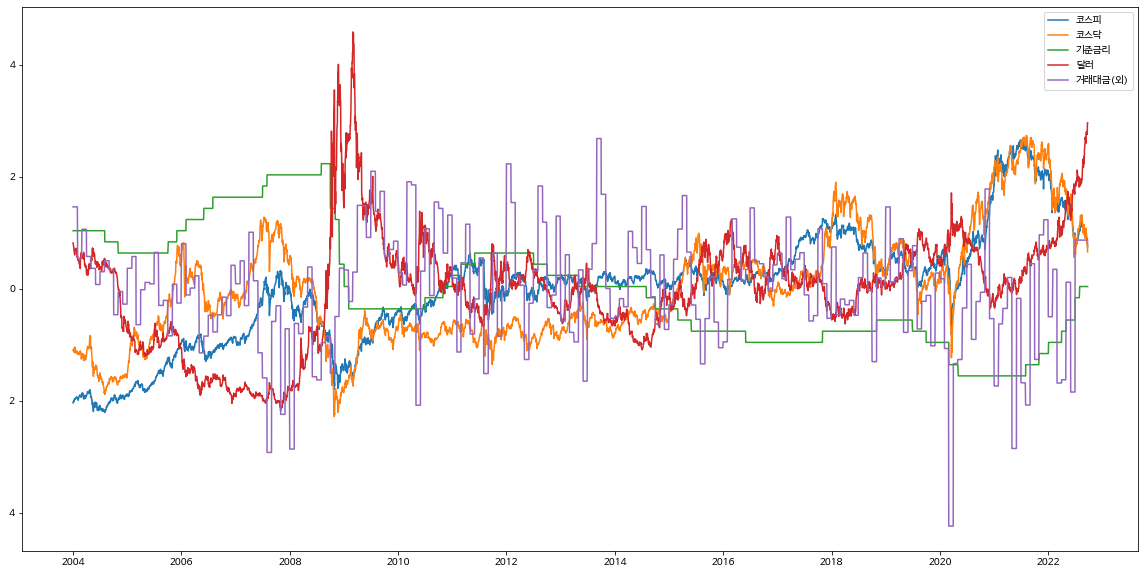

In [ ]:
plt.rc('font', family='NanumBarunGothic')  # 한글 폰트
plt.figure(figsize = (20,10))
plt.plot(all['코스피'])
plt.plot(all['코스닥'])
plt.plot(all['기준금리'])
plt.plot(all['달러'])
plt.plot(all['거래대금(외)'])
plt.legend(['코스피', '코스닥', '기준금리', '달러', '거래대금(외)'])


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


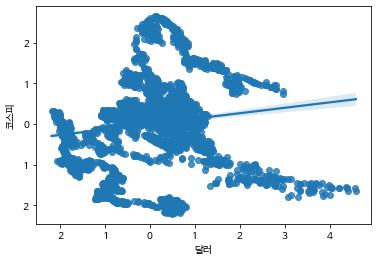

In [ ]:
sns.regplot(data = all, x='달러', y='코스피')